 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [9]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [10]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
portfolio_whale = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
portfolio_whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [11]:
# Count nulls
# YOUR CODE HERE
whale_returns = portfolio_whale.dropna()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [12]:
# Drop nulls
# YOUR CODE HERE
cumulative_whale = (1 + whale_returns).cumprod() - 1
cumulative_whale

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383
2015-03-05,0.004981,0.002314,-0.000681,0.004327
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466
...,...,...,...,...
2019-04-25,0.166895,-0.220575,-0.146676,0.550964
2019-04-26,0.176404,-0.213434,-0.136133,0.567147
2019-04-29,0.177880,-0.211295,-0.130733,0.575332


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [13]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
portfolio_algo = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
portfolio_algo.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [14]:
# Count nulls
portfolio_algo.isnull().sum(axis = 0)


Algo 1    0
Algo 2    6
dtype: int64

In [17]:
# Drop nulls
algo_returns = portfolio_algo.dropna()
algo_returns.head()


cumulative_algo = (1 + algo_returns).cumprod() - 1
cumulative_algo

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.005927,0.021679
2014-06-09,0.000885,0.027470
2014-06-10,0.005295,0.026714
2014-06-11,0.010081,0.022852
...,...,...
2019-04-25,1.145762,0.458997
2019-04-26,1.152159,0.466665
2019-04-29,1.163367,0.470814


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [18]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
portfolio_spy = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
portfolio_spy.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
# YOUR CODE HERE

In [20]:
# Fix Data Types

portfolio_spy['Close'] = portfolio_spy['Close'].str.replace('$', '')
portfolio_spy.head()

portfolio_spy['Close'] = portfolio_spy['Close'].astype('float')

In [25]:
# Daily Returns

spy_returns = portfolio_spy.pct_change().dropna()
spy_returns.head()




# Drop nulls
spy_returns.isnull()


# Rename Column
spy_returns.rename(columns={ "Close":"SPY Returns"}, inplace = True)

spy_returns.head()



# Cumulative returns SPY
cumulative_spy = (1 + spy_returns).cumprod() - 1
cumulative_spy

,SPY Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.009766
2019-04-17,-0.011327
2019-04-16,-0.009074
2019-04-15,-0.009578
...,...
2012-10-05,-0.502015
2012-10-04,-0.501854
2012-10-03,-0.505403


## Combine Whale, Algorithmic, and S&P 500 Returns

In [27]:
# Concatenate all DataFrames into a single DataFrame for daily returns
combine_portfolio = pd.concat([spy_returns, algo_returns, whale_returns], axis="columns", join="inner")
#combine_portfolio.head()

# concatenate all dataframes into single dataframe for cumulative returns
combine_portfolio_cumulative = pd.concat([cumulative_spy, cumulative_algo, cumulative_whale], axis="columns", join="inner")
combine_portfolio_cumulative.head()

,SPY Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-22,-0.008764,1.131361,0.455062,0.156280,-0.223061,-0.144348,0.533046
2019-04-18,-0.009766,1.129920,0.457884,0.159278,-0.217322,-0.141222,0.534716
2019-04-17,-0.011327,1.131173,0.459678,0.157602,-0.218277,-0.141721,0.531781
2019-04-16,-0.009074,1.153355,0.467349,0.160965,-0.213189,-0.137920,0.526861
2019-04-15,-0.009578,1.168414,0.463107,0.157839,-0.213494,-0.137203,0.525584


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

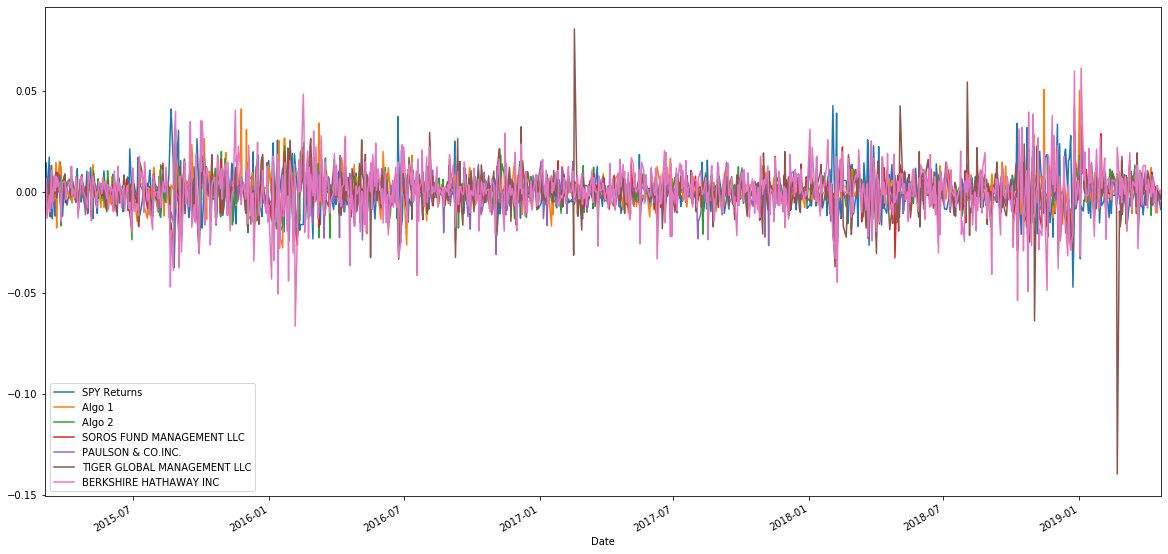

In [28]:
# Plot daily returns
combine_portfolio.plot(figsize=(20, 10))

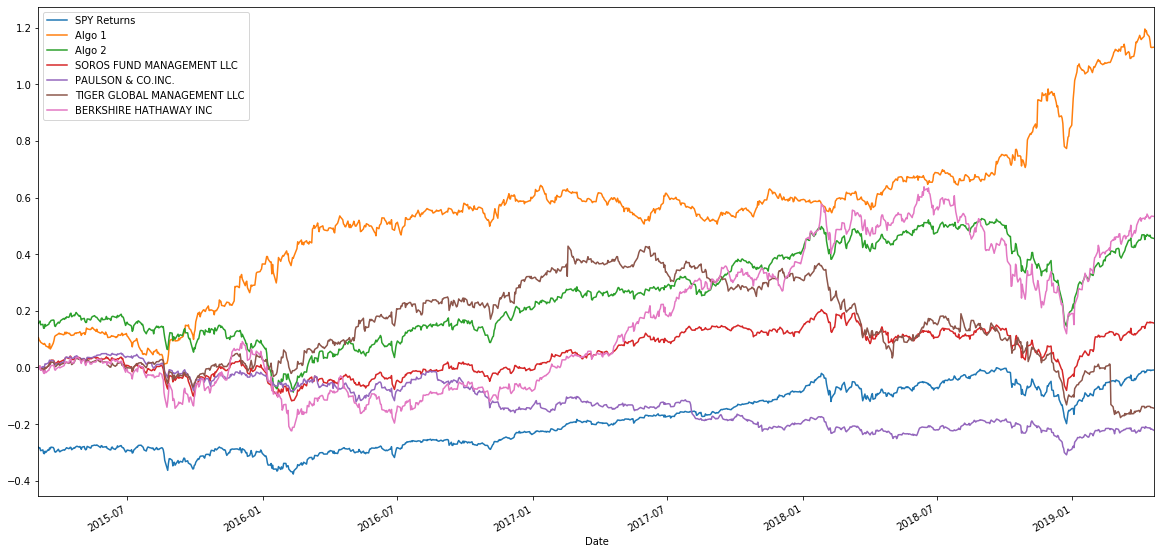

In [29]:
# Plot cumulative returns
combine_portfolio_cumulative.plot(figsize=(20, 10))


---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

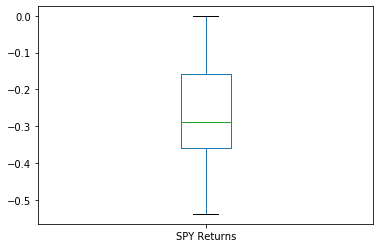

In [30]:
# Box plot to visually show risk for SPY
cumulative_spy.plot.box()


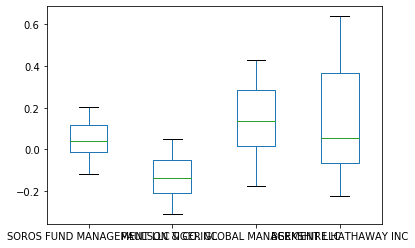

In [34]:
cumulative_whale.plot.box()



In [35]:
daily_std_spy = spy_returns.std()
daily_std_spy.head()


daily_std_whale = whale_returns.std()
daily_std_whale.head()



# Daily Standard Deviation for Algo
daily_std_algo = algo_returns.std()
daily_std_algo.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [37]:


annualized_std_spy = daily_std_spy * np.sqrt(252)
annualized_std_spy.head()

annualized_std_whale = daily_std_whale * np.sqrt(252)
annualized_std_whale.head()


annualized_std_algo = daily_std_algo * np.sqrt(252)
annualized_std_algo.head()


Algo 1    0.126801
Algo 2    0.134401
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

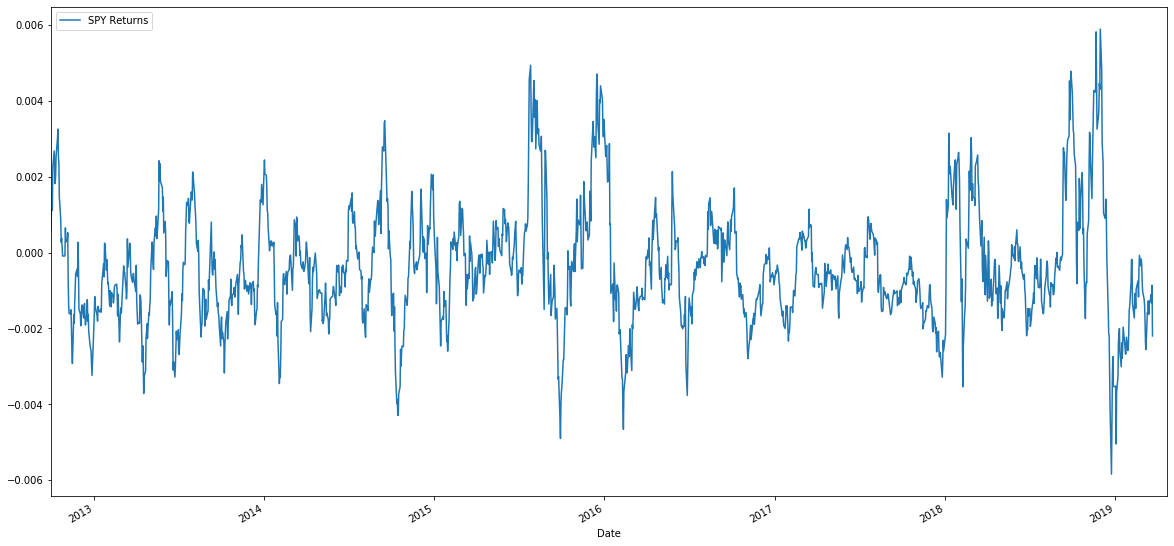

In [38]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
spy_returns.rolling(window=21).mean().plot(figsize=(20, 10))


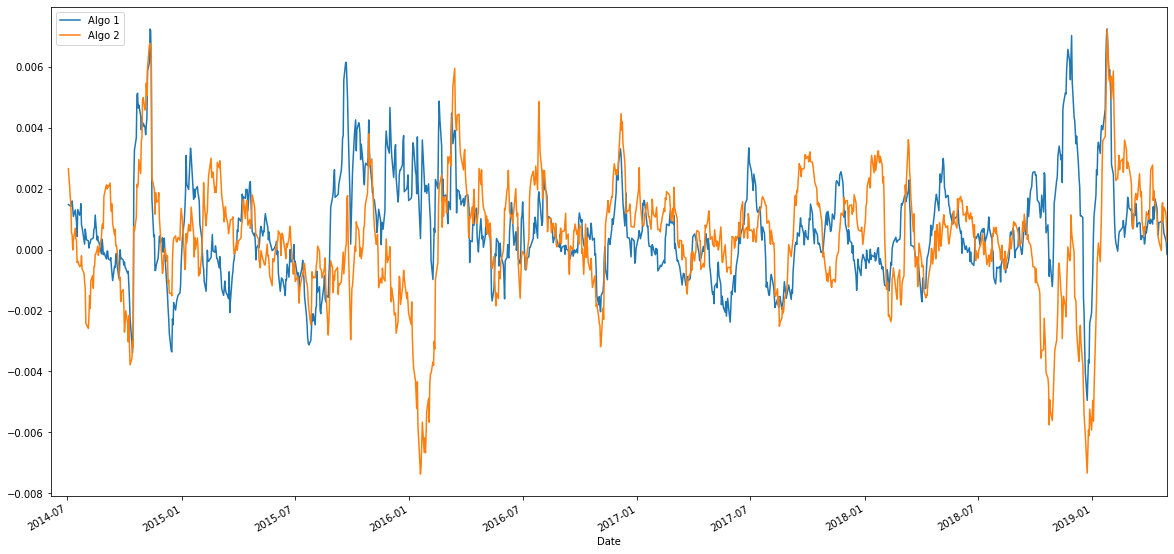

In [39]:
# Correlation
algo_returns.rolling(window=21).mean().plot(figsize=(20, 10))


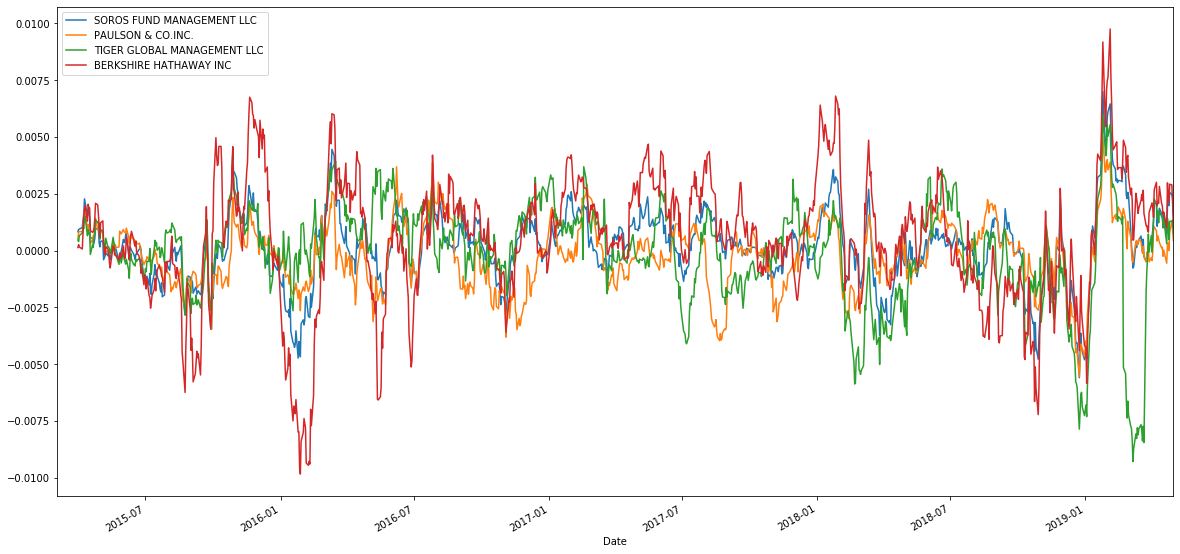

In [40]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
whale_returns.rolling(window=21).mean().plot(figsize=(20, 10))


In [44]:
spy_correlation = combine_portfolio.corr()
#spy_correlation

covariance = combine_portfolio['SPY Returns'].cov(combine_portfolio['SOROS FUND MANAGEMENT LLC'])
covariance

3.8897269830640045e-08

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [24]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [45]:
# Annualzied Sharpe Ratios

#Sharpe ratio for combined portfolio
sharpe_ratios = (combine_portfolio.mean() * 252) / (combine_portfolio.std() * np.sqrt(252))
sharpe_ratios

SPY Returns                   -0.518582
Algo 1                         1.369589
Algo 2                         0.484334
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

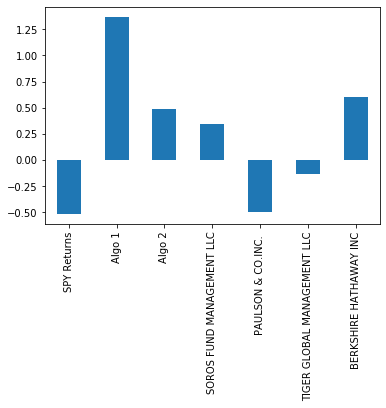

In [46]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind ="bar")


---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Read the first stock
# YOUR CODE HERE

In [28]:
# Read the second stock
# YOUR CODE HERE

In [29]:
# Read the third stock
# YOUR CODE HERE

In [30]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

In [31]:
# Reset the index
# YOUR CODE HERE

In [33]:
# Drop Nulls
# YOUR CODE HERE

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# YOUR CODE HERE

In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [37]:
# Risk
# YOUR CODE HERE

In [38]:
# Rolling
# YOUR CODE HERE

In [39]:
# Beta
# YOUR CODE HERE

In [40]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

In [41]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [42]:
# YOUR CODE HERE